In [1]:
from tensorflow.keras.models import load_model

model = load_model('./cifar10_cnn.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
# Define labels
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

In [4]:
import numpy as np
from PIL import Image

input_img_row = Image.open('./img/airplane2.jpg')
input_img_resize = input_img_row.resize((32,32))
input_img = np.array(input_img_resize)

In [5]:
input_img = input_img.astype('float32') / 255

In [6]:
input_img = input_img[np.newaxis,:,:]
input_img.shape

(1, 32, 32, 3)

<Figure size 648x1080 with 0 Axes>

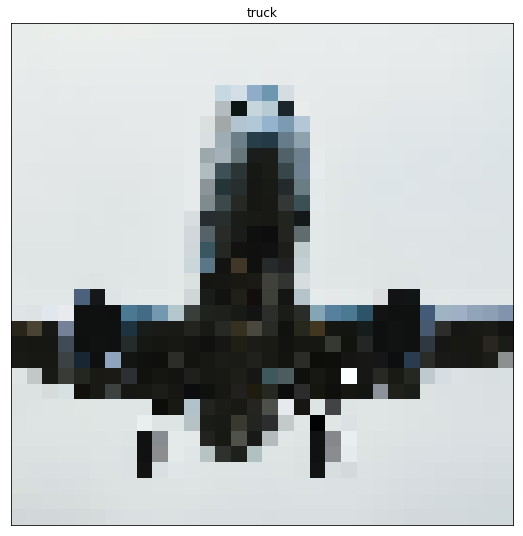

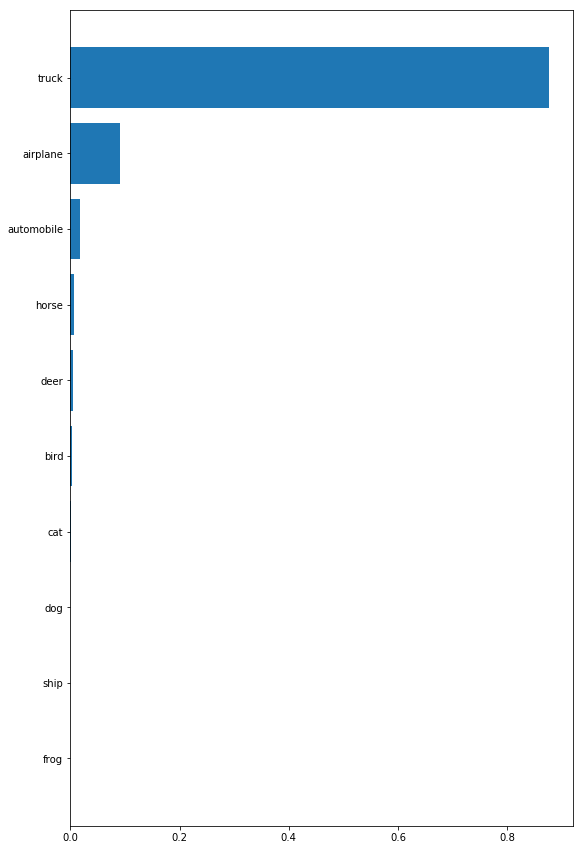

In [10]:
import matplotlib.pyplot as plt

y_pred = model.predict(input_img)
y_proba = model.predict_proba(input_img)
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

num = 1
for i in range(num):
    fig = plt.figure(figsize=(9, 15))
    y = y_pred[i].argmax()
    ax = fig.add_subplot(num,1, i+1, xticks=[], yticks=[])
    ax.imshow(input_img[i])
    plt.title(cifar10_labels[np.argmax(y_pred[i])])
    fig = plt.figure(figsize=(9, 15))
    plt.barh(np.arange(0,10),y_proba[i][y_proba[i].argsort()[::1]])
    plt.yticks(np.arange(0,10),cifar10_labels[y_proba[i].argsort()[::1]])
    plt.show()